# MSA 2024 Phase 2 - Part 1 - Keqi Liao

In [14]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Find all variables and understand them

In [24]:
# Load the dataset
df = pd.read_csv('store_sales.csv', encoding='ISO-8859-1')

num_rows, num_columns = df.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

# Display the first ten instances
print("First ten instances of the dataset:")
df.head(10)

The dataset contains 2121 rows and 21 columns.
First ten instances of the dataset:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [16]:
# Identify columns by their data types
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Count the number of columns of each type
num_numeric = len(numeric_columns)
num_categorical = len(categorical_columns)

print(f"Number of numeric columns: {num_numeric}")
print(f"Number of categorical columns: {num_categorical}")

# Print the column names for verification
print("\nNumeric columns:")
print(numeric_columns)

print("\nCategorical columns:")
print(categorical_columns)

Number of numeric columns: 6
Number of categorical columns: 15

Numeric columns:
Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

Categorical columns:
Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')


In [17]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

# Display columns with missing values, if any
columns_with_missing_values = missing_values[missing_values > 0]
print("\nColumns with missing values:")
columns_with_missing_values

Missing values in each column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Columns with missing values:


Series([], dtype: int64)

In [5]:
# Display column names and their data types
print("\nColumn names and data types:")
df.dtypes


Column names and data types:


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [6]:
# Calculate and display key statistical measures
print("\nStatistical measures:")
df.describe()


Statistical measures:


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


The dataset contains detailed transaction records from a retail store, comprising 2121 rows and 21 columns. It includes various attributes such as order details, customer information, product specifics, and sales figures, providing a comprehensive overview of the store's operations. There are 6 Numeric Columns and 15 Categorical Column. With no missing value.

Based on these statistical measures, we can draw that Row ID and Postal Code are purely identifiers and do not contribute to the analysis of sales performance.
Sales and Profit show high variability, with profits having both large negative and positive values, indicating the presence of both highly profitable and highly unprofitable transactions.
Discounts have a range from 0 to 70%, with an average discount of 17.4%, showing a significant variability in discount strategies.
Quantity shows that the majority of transactions involve a small number of items, with a maximum of 14 items per transaction.

# 2. Visualise data

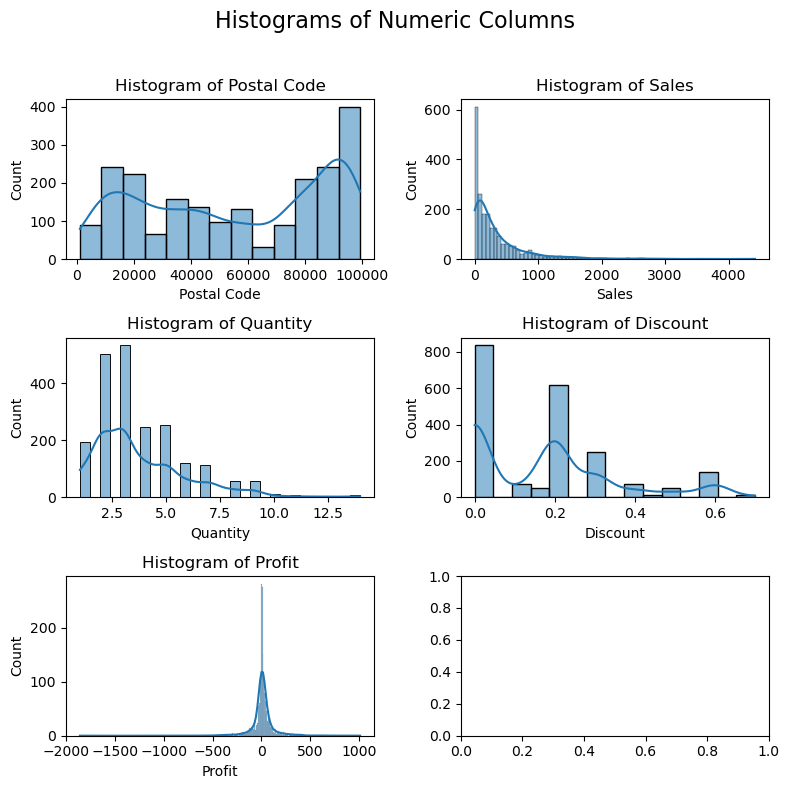

In [124]:
# Visualize numerical columns

# Plot histograms in a grid layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
fig.suptitle('Histograms of Numeric Columns', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

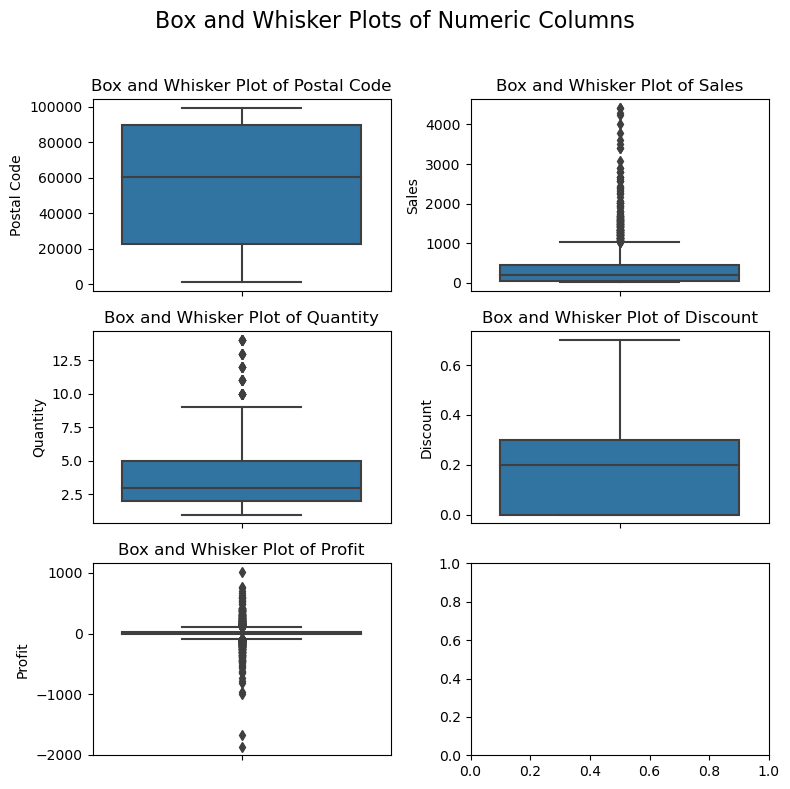

In [123]:
# Plot box and whisker plots in a grid layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
fig.suptitle('Box and Whisker Plots of Numeric Columns', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Box and Whisker Plot of {column}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [159]:
print(df['Country'].unique())
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['Region'].unique())
print(df['Category'].unique())
print(df['Sub-Category'].unique())

['United States']
['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['South' 'West' 'East' 'Central']
['Furniture']
['Bookcases' 'Chairs' 'Tables' 'Furnishings']


In [161]:
Category_columns = ['Sub-Category','Segment','Ship Mode','Region']
category_counts = {col: df[col].value_counts() for col in Category_columns}
print(category_counts)

{'Sub-Category': Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64, 'Segment': Consumer       1113
Corporate       646
Home Office     362
Name: Segment, dtype: int64, 'Ship Mode': Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: Ship Mode, dtype: int64, 'Region': West       707
East       601
Central    481
South      332
Name: Region, dtype: int64}


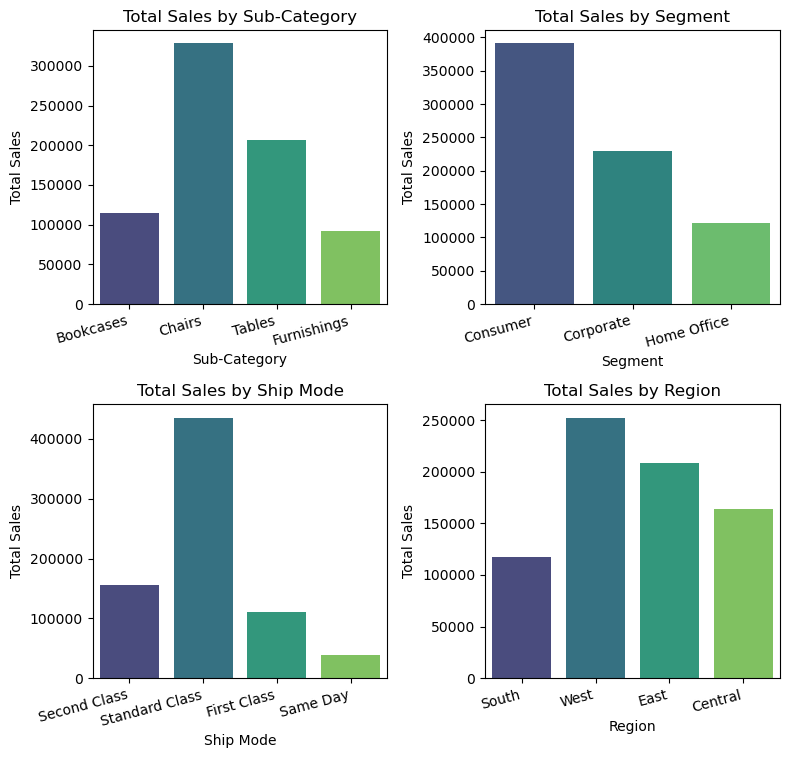

In [122]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes = axes.flatten()
for i, column in enumerate(Category_columns):
    sns.barplot(data=df, y='Sales', x=column, estimator=sum, ci=None, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Total Sales by {column}')
    axes[i].set_ylabel('Total Sales')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=15, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



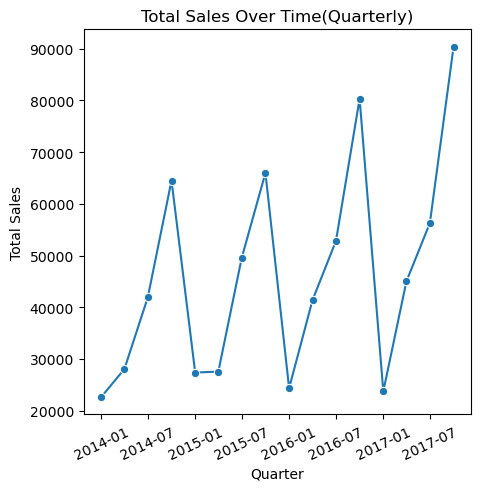

In [131]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

df2=df
# Create a new column for Quarter and Year
df2['Quarter'] = df2['Order Date'].dt.to_period('Q')
df2 = df2.groupby(['Quarter'])['Sales'].sum().reset_index()
df2['Quarter'] = df2['Quarter'].dt.to_timestamp()
plt.figure(figsize=(5, 5))
sns.lineplot(data=df2, x='Quarter', y='Sales', marker='o', palette='viridis', ci=None)
plt.title('Total Sales Over Time(Quarterly)')
plt.xlabel('Quarter')
plt.xticks(rotation=25)
plt.ylabel('Total Sales')
plt.show()

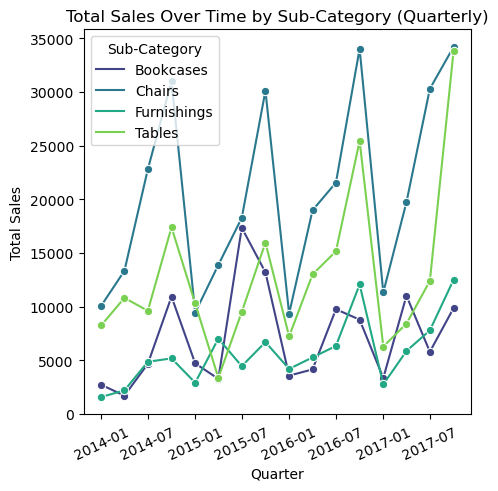

In [132]:
df2=df
# Create a new column for Quarter and Year
df2['Quarter'] = df2['Order Date'].dt.to_period('Q')
df2 = df2.groupby(['Quarter', 'Sub-Category'])['Sales'].sum().reset_index()
df2['Quarter'] = df2['Quarter'].dt.to_timestamp()
plt.figure(figsize=(5, 5))
sns.lineplot(data=df2, x='Quarter', y='Sales', hue='Sub-Category', marker='o', palette='viridis', ci=None)
plt.title('Total Sales Over Time by Sub-Category (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=25)
plt.legend(title='Sub-Category')
plt.show()


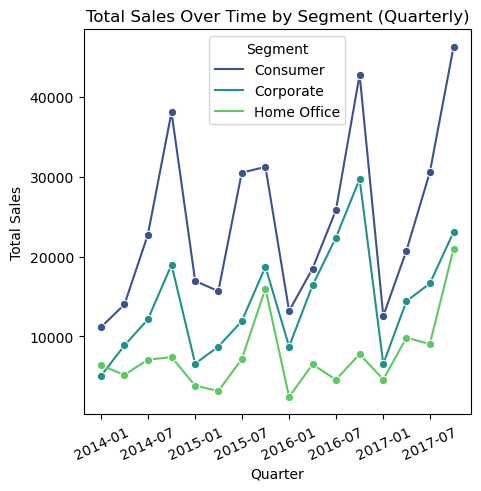

In [133]:
df2=df
# Create a new column for Quarter and Year
df2['Quarter'] = df2['Order Date'].dt.to_period('Q')
df2 = df2.groupby(['Quarter', 'Segment'])['Sales'].sum().reset_index()
df2['Quarter'] = df2['Quarter'].dt.to_timestamp()
plt.figure(figsize=(5, 5))
sns.lineplot(data=df2, x='Quarter', y='Sales', hue='Segment', marker='o', palette='viridis', ci=None)
plt.title('Total Sales Over Time by Segment (Quarterly)')
plt.xlabel('Quarter')
plt.xticks(rotation=25)
plt.ylabel('Total Sales')
plt.legend(title='Segment')
plt.show()

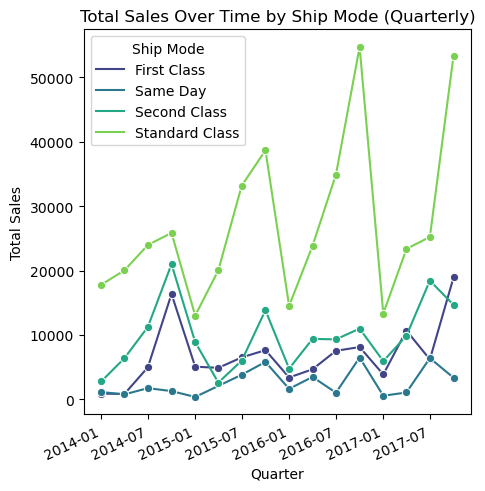

In [173]:
df2=df
# Create a new column for Quarter and Year
df2['Quarter'] = df2['Order Date'].dt.to_period('Q')
df2 = df2.groupby(['Quarter', 'Ship Mode'])['Sales'].sum().reset_index()
df2['Quarter'] = df2['Quarter'].dt.to_timestamp()
plt.figure(figsize=(5, 5))
sns.lineplot(data=df2, x='Quarter', y='Sales', hue='Ship Mode', marker='o', palette='viridis', ci=None)
plt.title('Total Sales Over Time by Ship Mode (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks( rotation=25, ha='right')
plt.legend(title='Ship Mode')
plt.show()

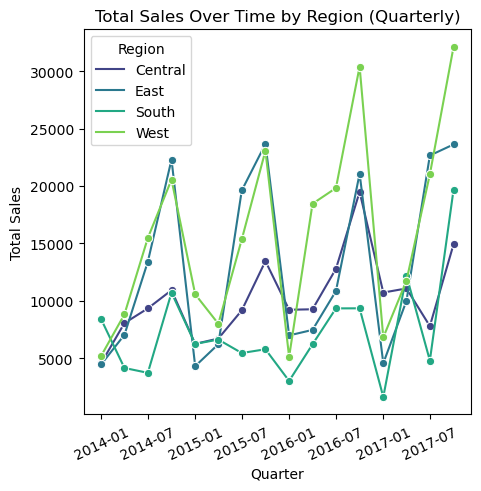

In [135]:
df2=df
# Create a new column for Quarter and Year
df2['Quarter'] = df2['Order Date'].dt.to_period('Q')
df2 = df2.groupby(['Quarter', 'Region'])['Sales'].sum().reset_index()
df2['Quarter'] = df2['Quarter'].dt.to_timestamp()
plt.figure(figsize=(5, 5))
sns.lineplot(data=df2, x='Quarter', y='Sales', hue='Region', marker='o', palette='viridis', ci=None)
plt.title('Total Sales Over Time by Region (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=25)
plt.legend(title='Region')
plt.show()

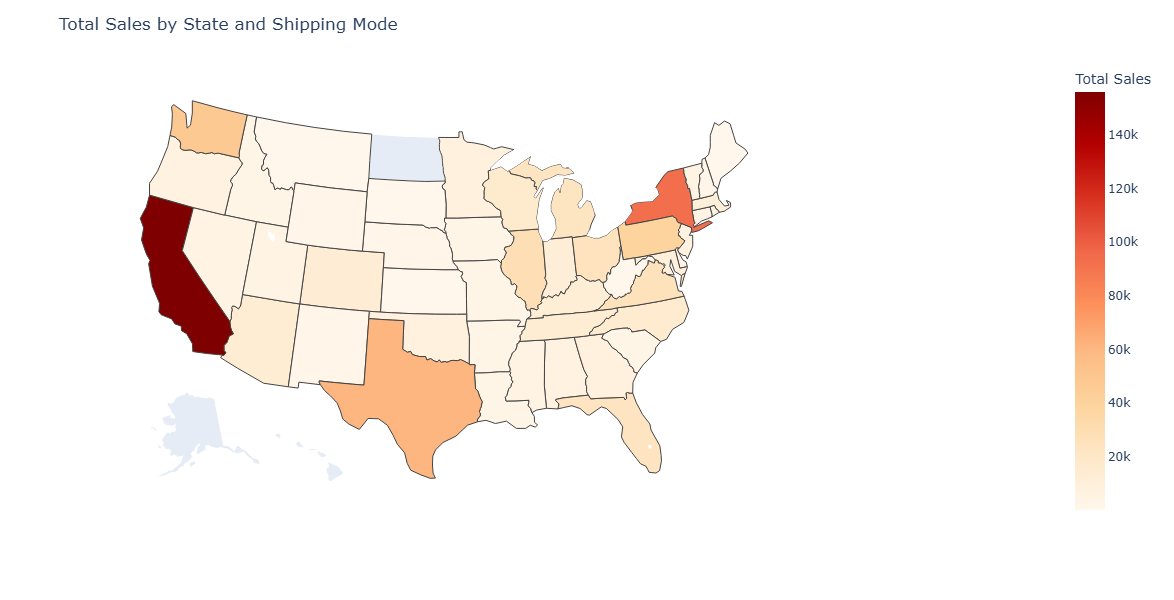

In [154]:
import plotly.express as px
import plotly.graph_objects as go
# Assuming df_clean is your cleaned dataframe
# Aggregate sales by state
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()

# State codes mapping (FIPS codes for Plotly)
state_codes = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Map the state names to their codes
sales_by_state['State_Code'] = sales_by_state['State'].map(state_codes)

# Create the choropleth map
fig = px.choropleth(
    sales_by_state,
    locations='State_Code',
    locationmode="USA-states",
    color='Sales',
    hover_name='State',
    color_continuous_scale='OrRd',
    scope="usa",
    labels={'Sales': 'Total Sales'}
)

# Update layout with specified size
fig.update_layout(
    title_text='Total Sales by State and Shipping Mode',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa')
    ),
    width=1000,  # specify the width of the figure
    height=600   # specify the height of the figure
)


fig.show()


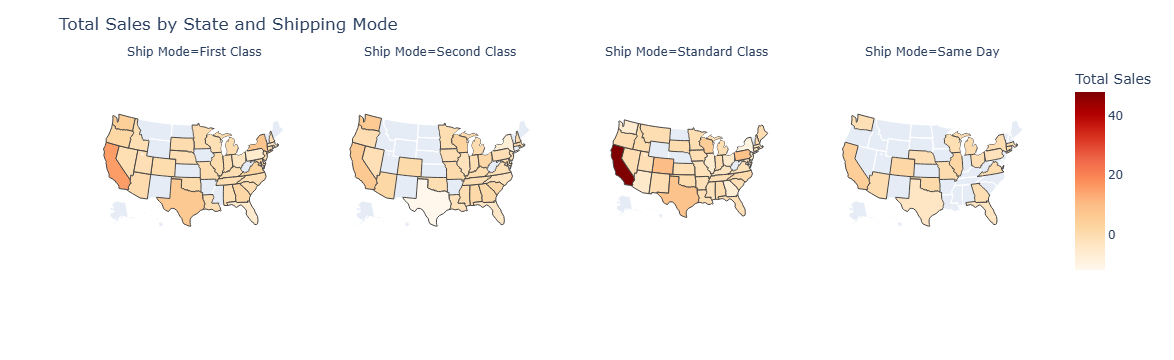

In [147]:
# Aggregate sales by state and shipping mode
sales_by_state_shipping = df_clean.groupby(['State', 'Ship Mode'])['Sales'].sum().reset_index()

# Map the state names to their codes
sales_by_state_shipping['State_Code'] = sales_by_state_shipping['State'].map(state_codes)

# Create the faceted choropleth map
fig = px.choropleth(
    sales_by_state_shipping,
    locations='State_Code',
    locationmode="USA-states",
    color='Sales',
    hover_name='State',
    facet_col='Ship Mode',
    color_continuous_scale='OrRd',
    scope="usa",
    labels={'Sales': 'Total Sales'}
)

# Update layout
fig.update_layout(
    title_text='Total Sales by State and Shipping Mode',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa')
    )
)

fig.show()

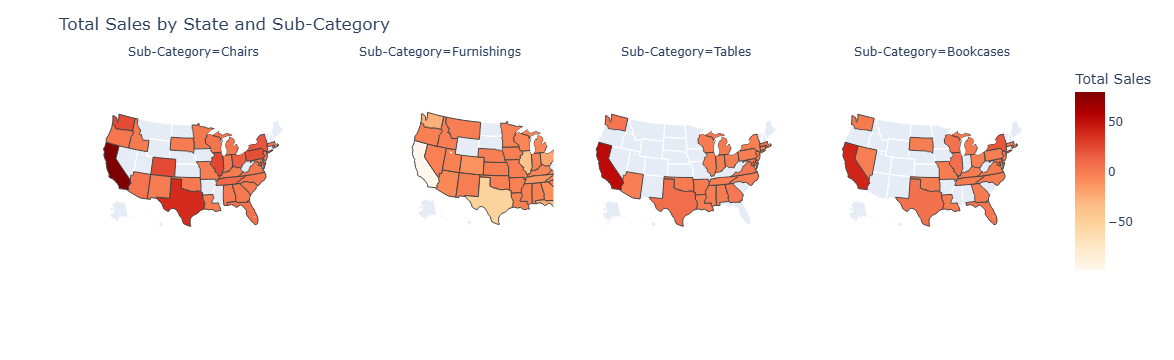

In [137]:
# Aggregate sales by state and shipping mode
sales_by_state_shipping = df_clean.groupby(['State', 'Sub-Category'])['Sales'].sum().reset_index()

# Map the state names to their codes
sales_by_state_shipping['State_Code'] = sales_by_state_shipping['State'].map(state_codes)

# Create the faceted choropleth map
fig = px.choropleth(
    sales_by_state_shipping,
    locations='State_Code',
    locationmode="USA-states",
    color='Sales',
    hover_name='State',
    facet_col='Sub-Category',
    color_continuous_scale='OrRd',
    scope="usa",
    labels={'Sales': 'Total Sales'}
)

# Update layout
fig.update_layout(
    title_text='Total Sales by State and Sub-Category',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa')
    )
)

fig.show()

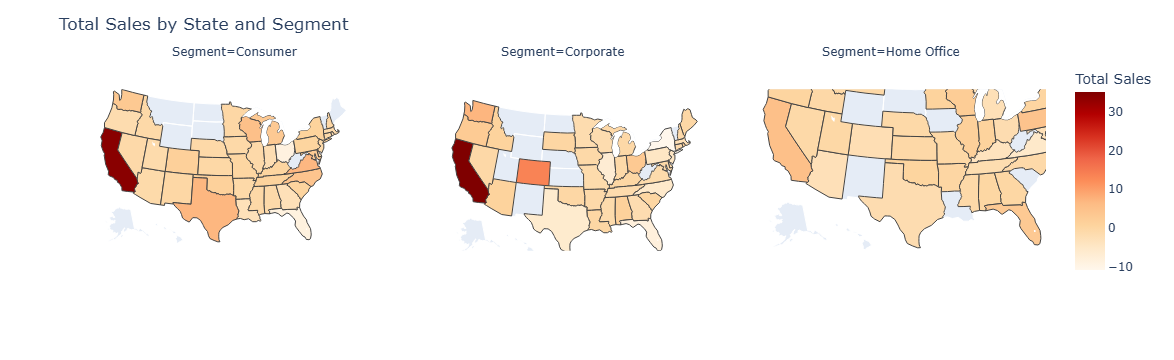

In [138]:
# Aggregate sales by state and shipping mode
sales_by_state_shipping = df_clean.groupby(['State', 'Segment'])['Sales'].sum().reset_index()

# Map the state names to their codes
sales_by_state_shipping['State_Code'] = sales_by_state_shipping['State'].map(state_codes)

# Create the faceted choropleth map
fig = px.choropleth(
    sales_by_state_shipping,
    locations='State_Code',
    locationmode="USA-states",
    color='Sales',
    hover_name='State',
    facet_col='Segment',
    color_continuous_scale='OrRd',
    scope="usa",
    labels={'Sales': 'Total Sales'}
)

# Update layout
fig.update_layout(
    title_text='Total Sales by State and Segment',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa')
    )
)

fig.show()

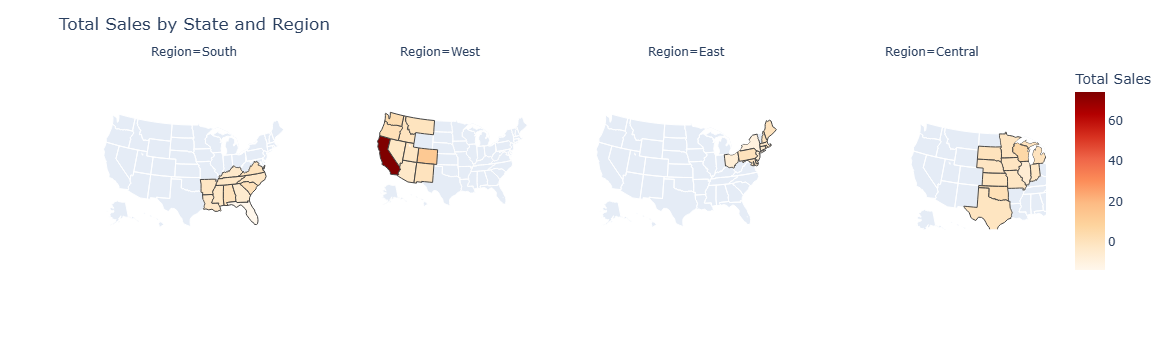

In [139]:

# Aggregate sales by state and Region
sales_by_state_shipping = df_clean.groupby(['State', 'Region'])['Sales'].sum().reset_index()

# Map the state names to their codes
sales_by_state_shipping['State_Code'] = sales_by_state_shipping['State'].map(state_codes)

# Create the faceted choropleth map
fig = px.choropleth(
    sales_by_state_shipping,
    locations='State_Code',
    locationmode="USA-states",
    color='Sales',
    hover_name='State',
    facet_col='Region',
    color_continuous_scale='OrRd',
    scope="usa",
    labels={'Sales': 'Total Sales'}
)

# Update layout
fig.update_layout(
    title_text='Total Sales by State and Region',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa')
    )
)

fig.show()

# 3. Clean data

In [147]:
# Drop unnecessary columns
columns_to_drop = ['Row ID', 'Order ID', 'Customer Name', 'Customer ID', 'Product ID', 'Product Name','Ship Date','Country','Category','Region']
df_clean = df.drop(columns=columns_to_drop)

print("Remaining columns after dropping unnecessary ones:")
print(df_clean.columns)

Remaining columns after dropping unnecessary ones:
Index(['Order Date', 'Ship Mode', 'Segment', 'City', 'State', 'Postal Code',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Function to remove outliers
def remove_outliers(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

# Remove outliers for Sales, Quantity, and Profit
df_clean = remove_outliers(df_clean, 'Sales')
df_clean = remove_outliers(df_clean, 'Quantity')
df_clean = remove_outliers(df_clean, 'Profit')

In [149]:
# Standardize the numeric columns 
numeric_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], format='%m/%d/%Y')

In [150]:
# Hierarchical Encoding for 'City' and 'State'
state_encoder = LabelEncoder()
city_encoder = LabelEncoder()

df_clean['State_Encoded'] = state_encoder.fit_transform(df_clean['State'])
df_clean['City_Encoded'] = city_encoder.fit_transform(df_clean['City'])

# Combine the hierarchical encoding
df_clean['Hierarchical_Encoded'] = df_clean['State_Encoded'] * 1000 + df_clean['City_Encoded']

In [151]:
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'

# Apply the function to the date column
df_clean['season'] = df_clean['Order Date'].apply(get_season)

In [153]:
# Drop the original 'City' and 'State' 'State_Encoded','City_Encoded' and 'Order Date' columns 
df_clean = df_clean.drop(columns=['City', 'State','State_Encoded','City_Encoded','Order Date'])
df_clean.head(5)

,Ship Mode,Segment,Postal Code,Sub-Category,Sales,Quantity,Discount,Profit,Hierarchical_Encoded,season
0,Second Class,Consumer,-0.431061,Bookcases,0.458066,-0.712379,-0.937112,1.169318,15122,Autumn
3,Standard Class,Consumer,1.033744,Furnishings,-0.659835,2.126119,-0.937112,0.187242,3165,Summer
5,Second Class,Consumer,-1.147281,Chairs,-0.541740,-0.712379,0.833765,-0.350410,35235,Summer
8,Standard Class,Consumer,-1.147281,Furnishings,-0.264609,-0.144680,0.243472,0.235227,35235,Autumn
10,Standard Class,Home Office,0.634070,Bookcases,1.876763,-0.144680,0.951823,-1.977166,40131,Winter


In [154]:
categorical_columns = df_clean.select_dtypes(include=['object']).columns
# Encode other categorical columns using LabelEncoder
for col in categorical_columns:
    if col not in ['City', 'State','Order Date']:
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col])

In [155]:
# Display the first 5 rows of the final dataframe
df_clean.head(5)

,Ship Mode,Segment,Postal Code,Sub-Category,Sales,Quantity,Discount,Profit,Hierarchical_Encoded,season
0,2,0,-0.431061,0,0.458066,-0.712379,-0.937112,1.169318,15122,0
3,3,0,1.033744,2,-0.659835,2.126119,-0.937112,0.187242,3165,2
5,2,0,-1.147281,1,-0.541740,-0.712379,0.833765,-0.350410,35235,2
8,3,0,-1.147281,2,-0.264609,-0.144680,0.243472,0.235227,35235,0
10,3,2,0.634070,0,1.876763,-0.144680,0.951823,-1.977166,40131,3


# 4. Identify correlated variables

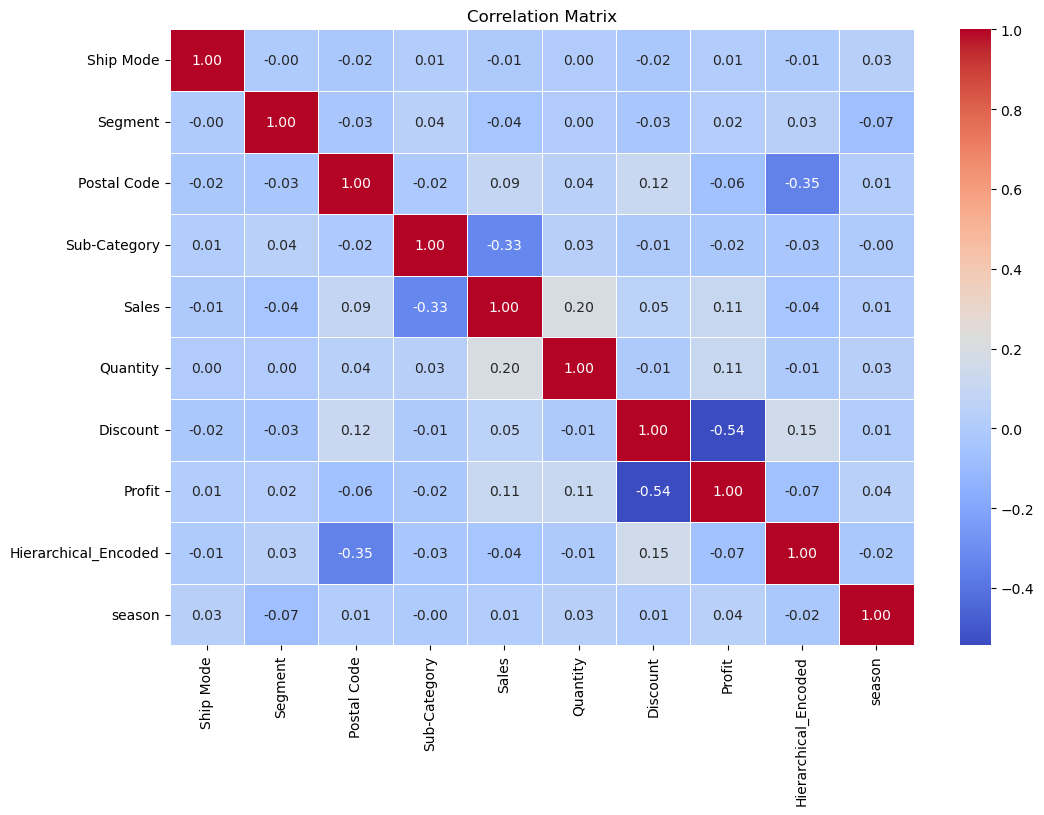

                      Ship Mode   Segment  Postal Code  Sub-Category  \
Ship Mode              1.000000 -0.003930    -0.023777      0.007828   
Segment               -0.003930  1.000000    -0.033717      0.040894   
Postal Code           -0.023777 -0.033717     1.000000     -0.017055   
Sub-Category           0.007828  0.040894    -0.017055      1.000000   
Sales                 -0.007976 -0.041425     0.092710     -0.332004   
Quantity               0.002119  0.004516     0.036787      0.034999   
Discount              -0.023508 -0.029294     0.116877     -0.007983   
Profit                 0.010809  0.019233    -0.062771     -0.021960   
Hierarchical_Encoded  -0.006964  0.029709    -0.349690     -0.025192   
season                 0.032795 -0.073482     0.007027     -0.004986   

                         Sales  Quantity  Discount    Profit  \
Ship Mode            -0.007976  0.002119 -0.023508  0.010809   
Segment              -0.041425  0.004516 -0.029294  0.019233   
Postal Code    

,Ship Mode,Segment,Postal Code,Sub-Category,Sales,Quantity,Discount,Profit,Hierarchical_Encoded,season
0,2,0,-0.431061,0,0.458066,-0.712379,-0.937112,1.169318,15122,0
3,3,0,1.033744,2,-0.659835,2.126119,-0.937112,0.187242,3165,2
5,2,0,-1.147281,1,-0.541740,-0.712379,0.833765,-0.350410,35235,2
8,3,0,-1.147281,2,-0.264609,-0.144680,0.243472,0.235227,35235,0
10,3,2,0.634070,0,1.876763,-0.144680,0.951823,-1.977166,40131,3


In [156]:
corr_matrix = df_clean.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Print the correlation matrix to examine relationships
print(corr_matrix)

# Identify pairs of highly correlated variables (absolute correlation > 0.8)
high_corr_pairs = [(col1, col2, corr_matrix.loc[col1, col2]) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.8]

# Display highly correlated pairs
print("Highly correlated pairs (|correlation| > 0.8):")
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} and {col2}: {corr_value}")

# Drop one feature from each highly correlated pair to avoid multicollinearity
# For demonstration, let's assume we drop the second feature in each pair
features_to_drop = {col2 for col1, col2, _ in high_corr_pairs}

# Keep the remaining features
df_clean_reduced = df_clean.drop(columns=features_to_drop)

# Print the features that were dropped
print("Dropped features due to high correlation:")
print(features_to_drop)

# Return the reduced dataframe
df_clean_reduced.head()

In [158]:
df_clean.to_csv('store_sales_part2.csv', index=False)

# 5. Summary

# 